In [5]:
from segnet.keras_segmentation.pretrained import pspnet_50_ADE_20K
from segnet.keras_segmentation.models.pspnet import pspnet_50
from segnet.keras_segmentation.models.model_utils import transfer_weights
from segnet.utils import infer_dir, infer_img
import cv2
import matplotlib.pyplot as plt
import random_walk.get_markers as gm
import numpy as np
import matplotlib.pyplot as plt
import random_walk.utils as uti
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

In [ ]:
path_img = 
path_mask = 
path_result_psp = 
path_result_random = 
n_classes = 

## PSPNet

In [10]:
pretrained_model = pspnet_50_ADE_20K()
model = pspnet_50(n_classes)
transfer_weights(pretrained_model, model) 

Copying weights 


225it [00:00, 842.78it/s] 

Copied weights of 120 layers and skipped 1 layers


## RandomWalk on "dataset1"

In [ ]:
nombre_labels = 2
size_of_markers = 10
beta_value = 10
markers, image = gm.create_label(path_img, nombre_labels, size_of_markers)

Vous pouvez labeliser l'image. 
 Pour chaque label cliquez sur les points présents dans le label puis appuyez sur 'espace' pour passer au label suivant
Labelisation de la section numero 1
[218 138]
[174 212]
[265 251]
[412 387]
[412 400]
Labelisation de la section numero 2
[309 403]
[ 72 395]
[380  48]
[141  38]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


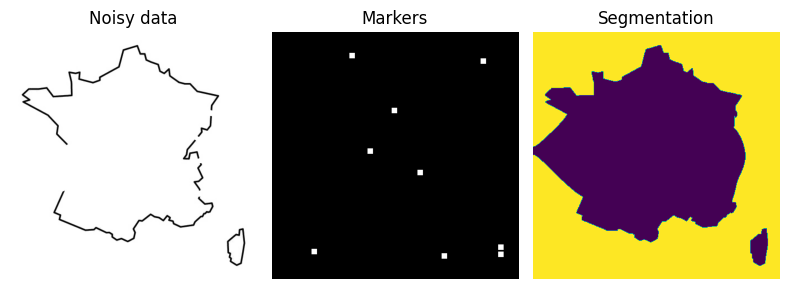

In [ ]:

labels = random_walker(np.mean(image, axis=2), np.mean(markers, axis=2), beta=beta_value, mode='bf')
uti.show_results_random_malk(image,markers,labels)

### Impact du bruit sur RandomWalk et PSPNet

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


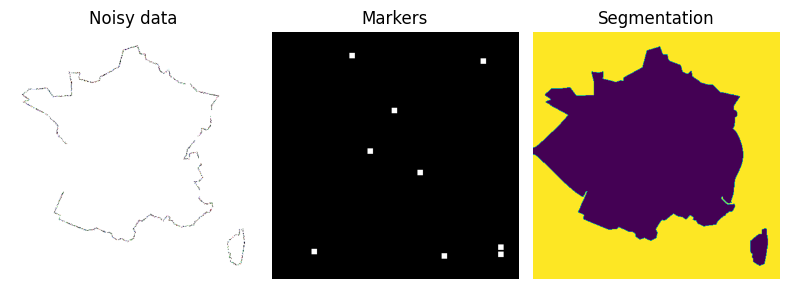

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


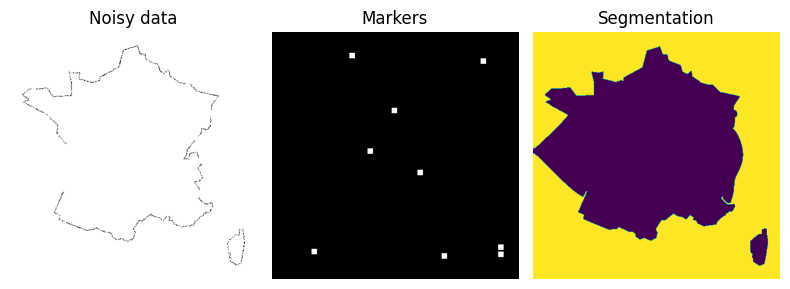

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


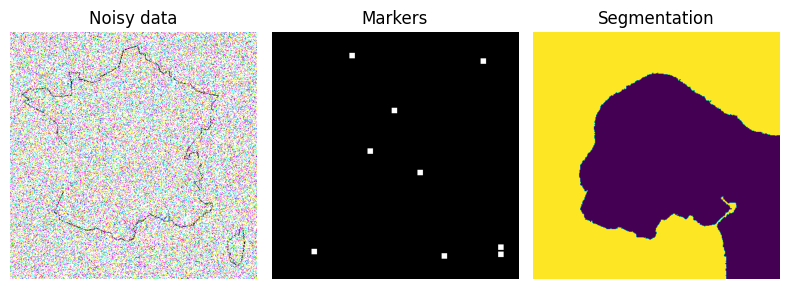

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


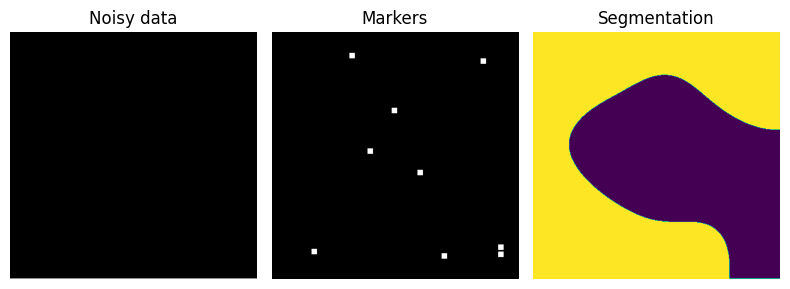

In [ ]:
modifications = ['gauss','poisson','speckle','s&p' ]
image_modifie = []

for i in range(len(modifications)):
    image_modifie.append(uti.noisy(modifications[i], image))
    
labels_modifiee_random = []
labels_modifiee_psp = []
for i in range(len(modifications)):
    labels_modifiee_random.append(random_walker(np.mean(image_modifie[i], axis=2), np.mean(markers, axis=2), beta=beta_value, mode='bf'))
    labels_modifiee_psp.append(model.predict(inp=image_modifie[i]))
    #out_fname="/tmp/out.png",

    uti.show_results_random_malk(image_modifie[i],markers,labels_modifiee_random[i])
    

## Évaluations

In [ ]:
inp_images_pred = model.predict_segmentation(
    inp="datasets/dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png",
)

plt.imshow(cv2.imread("datasets/dataset1/images_prepped_test/0016E5_07965.png"))
plt.show()
plt.imshow(cv2.imread("datasets/dataset1/annotations_prepped_test/0016E5_07965.png"))
plt.show()
plt.imshow(inp_images_pred)
plt.show()

annotations = cv2.imread("datasets/dataset1/annotations_prepped_test/0016E5_07965.png")

n_classes = 51

eval_segnet_dataset1 = evaluate(inp_images_pred, annotations, n_classes)